# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     757.6
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           3.79e-39
Time:                        11:21:18   Log-Likelihood:                -2.3280
No. Observations:                  50   AIC:                             12.66
Df Residuals:                      46   BIC:                             20.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1848      0.090     57.556      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.73136423  5.18528879  5.60199658  5.95543591  6.228957    6.4180475
  6.53107388  6.58790679  6.61665643  6.64905407  6.71523875  6.83880546
  7.03292857  7.29819736  7.62251914  7.98310609  8.3502192   8.69205435
  8.97996758  9.19318126  9.32219778  9.37035996  9.35330188  9.29638018
  9.23050811  9.1870765   9.1927964   9.26531047  9.41029439  9.62052434
  9.87706384 10.15237498 10.41484283 10.63396965 10.78538562 10.85485269
 10.8406039  10.75363364 10.61589134 10.45667521 10.30781867 10.19846015
 10.15025578 10.17382131 10.26698802 10.41515897 10.59370731 10.77202233
 10.91853877 11.00592286]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.00606439 10.88047202 10.6478919  10.35104418 10.04616356  9.78923112
  9.62226821  9.56304811  9.60074457  9.69858238]


## Plot comparison

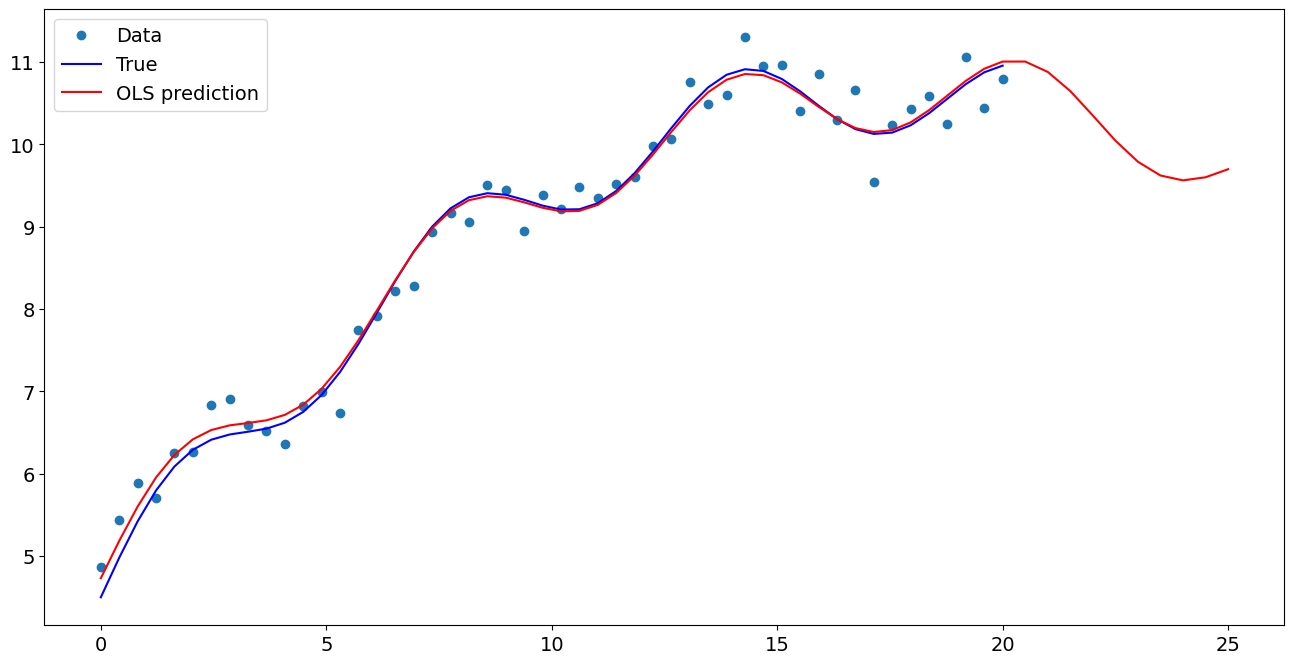

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.184805
x1                  0.473284
np.sin(x1)          0.478021
I((x1 - 5) ** 2)   -0.018138
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.006064
1    10.880472
2    10.647892
3    10.351044
4    10.046164
5     9.789231
6     9.622268
7     9.563048
8     9.600745
9     9.698582
dtype: float64